This is a standardised sensitivity analysis script for studying agent-based models. It can be altered to analyse specific models. There is a paper accompanying this script: [LINK]

# Library Imports
Here, the required libraries are imported. 

pandas: allows for powerful data storage and manipulation using DataFrames.

seaborn: used for creating good-looking graphics

matplotlib: used for creating plots

statsmodels: used for regression analysis

preprocessing: used for normalising data

math: used for general math functions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib, pylab as plt
#import numpy as np
from ast import literal_eval
import statsmodels.api as sm
from sklearn import preprocessing
import math

# Data import
Here, the data is imported. It's assumed that a csv-file will be used.

In [2]:
#.read_csv is used to open a csv file. The csv file should be in the same folder as the script. 
#The delimeter can be changed here as well.
df = pd.read_csv('input_file.csv', delimiter = ',')

#This option can be used to change the number of columns that are displayed in a DataFrame.              
pd.set_option('display.max_columns', 100)

#Ten random rows of the DataFrame are displayed. Check if the data import was succesful.                
df.sample(10)

,random_seed,ticks,equal_traders_production_site,traders_distribution,proportion_inter_site_links,clustering_coefficient,average_path_length
144,1,5000,False,uniform,0.0001,0.469097,13.726271
126,7,5000,False,exponential,0.0010,0.370932,6.392575
56,8,5000,True,uniform,0.0030,0.069038,5.096224
179,10,5000,False,uniform,0.0001,0.477439,13.574747
73,8,5000,True,uniform,0.0030,0.058615,5.078032
21,3,5000,True,exponential,0.0000,0.579656,85.346140
92,3,5000,False,exponential,0.0030,0.065509,5.138803
74,8,5000,True,uniform,0.0030,0.058615,5.078032
64,9,5000,True,uniform,0.0001,0.689327,15.350995
109,7,5000,False,exponential,0.0030,0.059142,5.123217


Boolean values, or categorical data with only 2 different values, should be converted to integers. This makes plotting the data easier.

In [3]:
#Changes boolean data to integers (True = 1, False = 0)
#df['boolean_data'] *= 1
df['equal_traders_production_site'] *= 1

#Replaces categorical data with 2 possible values to 0 or 1
#df = df.replace({'categorical_data': {'value_1': 0, 'value_2': 1})
df = df.replace({'traders_distribution': {'uniform': 0, 'exponential': 1}})

df.sample(10)

,random_seed,ticks,equal_traders_production_site,traders_distribution,proportion_inter_site_links,clustering_coefficient,average_path_length
50,4,5000,1,0,0.0000,0.493729,86.936630
33,3,5000,1,1,0.0000,0.579656,85.346140
93,3,5000,0,1,0.0030,0.065509,5.138803
22,3,5000,1,1,0.0010,0.332066,6.266582
167,2,5000,0,0,0.0010,0.376078,6.386368
169,10,5000,0,0,0.0001,0.600168,14.801363
119,7,5000,0,1,0.0000,0.466224,61.493150
54,8,5000,1,0,0.0030,0.069038,5.096224
175,4,5000,0,0,0.0001,0.485929,12.985889
46,4,5000,1,0,0.0000,0.493729,86.936630


# Determine dependent variable

These are the output variables of your model, such as time passed, number of agents, etc.

Sometimes you may calculate it from several of the output values.

In [4]:
df["dependent_variable"] = df.apply(lambda x: x["clustering_coefficient"] * x["average_path_length"], axis = 1)

df.sample(10)

,random_seed,ticks,equal_traders_production_site,traders_distribution,proportion_inter_site_links,clustering_coefficient,average_path_length,dependent_variable
179,10,5000,0,0,0.0001,0.477439,13.574747,6.481114
111,7,5000,0,1,0.0030,0.059142,5.123217,0.302997
117,7,5000,0,1,0.0000,0.466224,61.493150,28.669585
84,3,5000,1,0,0.0000,0.602603,90.426760,54.491450
98,5,5000,0,1,0.0010,0.369911,6.374332,2.357937
21,3,5000,1,1,0.0000,0.579656,85.346140,49.471433
53,4,5000,1,0,0.0000,0.493729,86.936630,42.923109
5,2,5000,1,1,0.0001,0.683678,17.531012,11.985574
155,1,5000,0,0,0.0001,0.667271,15.007469,10.014047
44,3,5000,1,1,0.0001,0.553593,13.324785,7.376514


# Regression analysis

### Regression of the full model
Regression of the full model should be done to understand the explanatory power of the entire model.

R-squared: shows how much changes in independent variables can explain the dependent variable, in percentages.

coef: increasing the independent variable by 1, changes the dependent variable by this amount, in other words 
      it explains which independent variables have the most explantory power. However, take note that variables
      with a tiny range will naturally have a higher coef, as is the case with proportion_inter_site_links.

In [5]:
#First, define all the independent variables you want to analyse, 
#include the random seed to check if it's significant or not.
'''
X = df[['random_seed', 
        'indepedent_variable_1',
        'independent_variable_2']]
'''

X = df[['random_seed', 
        'equal_traders_production_site', 
        'traders_distribution',
        'proportion_inter_site_links']]

X = sm.add_constant(X)

#Add the dependent variable you want to use.
mreg = sm.OLS(df['dependent_variable'], X)

results = mreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     dependent_variable   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     31.80
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           6.58e-20
Time:                        16:54:47   Log-Likelihood:                -759.97
No. Observations:                 180   AIC:                             1530.
Df Residuals:                     175   BIC:                             1546.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

H:\WindowsSoftware\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Regression of individual variables
Regression of individual variables should be done to understand the predictive power of specific variables.

Nowe we can see that proportion_inter_site_links has greater predictive power than equal_traders_production_site.

In [6]:
X = df[['equal_traders_production_site']]
X = sm.add_constant(X)
mreg = sm.OLS(df['dependent_variable'], X)
results = mreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     dependent_variable   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     41.42
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.10e-09
Time:                        16:54:47   Log-Likelihood:                -790.31
No. Observations:                 180   AIC:                             1585.
Df Residuals:                     178   BIC:                             1591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [7]:
X = df[['proportion_inter_site_links']]
X = sm.add_constant(X)
mreg = sm.OLS(df['dependent_variable'], X)
results = mreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     dependent_variable   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     76.00
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.95e-15
Time:                        16:54:47   Log-Likelihood:                -777.14
No. Observations:                 180   AIC:                             1558.
Df Residuals:                     178   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Regression of random seed
Check if the random seed is significant or not. If it seems to be significant, the variance of the model is too high to do regression analysis with this sample size.

We see now that random_seed explains 8% of our changes in the dependent_variable. 

In [8]:
X = df[['random_seed']]
X = sm.add_constant(X)
mreg = sm.OLS(df['dependent_variable'], X)
results = mreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     dependent_variable   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     15.94
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           9.54e-05
Time:                        16:54:47   Log-Likelihood:                -801.42
No. Observations:                 180   AIC:                             1607.
Df Residuals:                     178   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.4632      3.203      8.573      

# Data visualisation

### Line plot of all independent variables

All independent variables that were varied throughout the simulations are plotted against the dependent variable of all runs for each value of the independent variable. The values of the independent variables are normalised.

Graphs like these can be used to quickly isolate or present which variables have high predictive power.

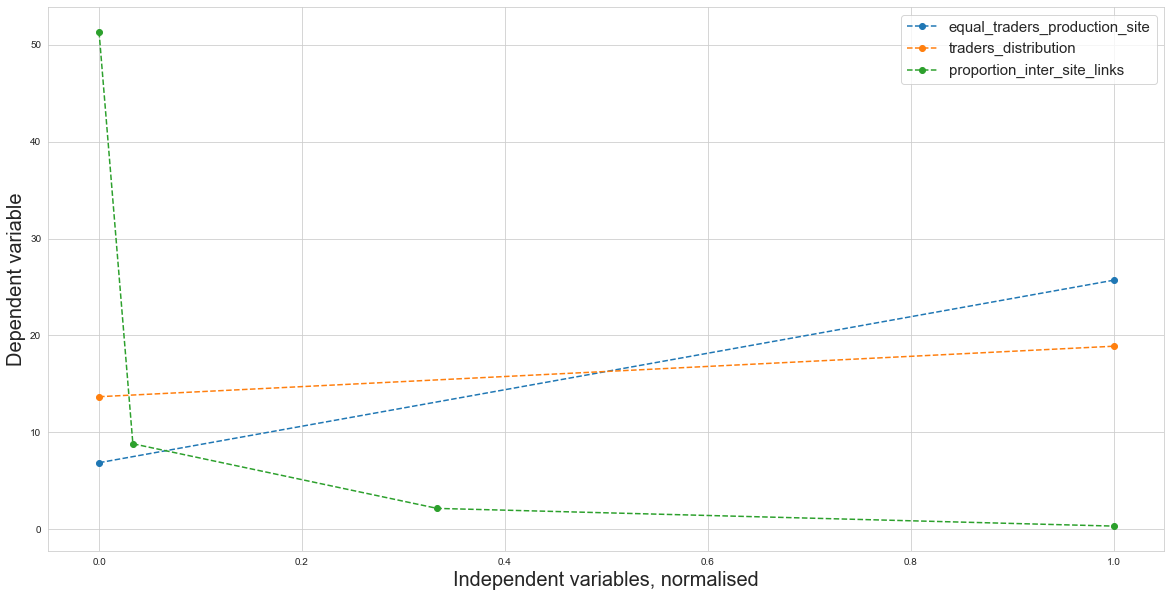

In [9]:
#First, create a list of independent variables that will be used to create graphs
"""
independent_variables = ['independent_variable1', 
                         'independent_variable2', 
                         'independent_variable3']
"""

independent_variables = ['equal_traders_production_site', 
                         'traders_distribution',
                         'proportion_inter_site_links']

#Set the figure style and size
fig = plt.figure(figsize = (20, 10))
sns.set_style('whitegrid')

#Set the scaler, which noramlises our data.
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

#Create the plot
for i in independent_variables:
    df_temp = df.groupby(['{}'.format(i)]).mean().reset_index()
    df_temp["{}".format(i)]=scaler.fit_transform(df_temp[["{}".format(i)]])
    
    #Add the depdent variable
    plt.plot(i, 'dependent_variable', data=df_temp, linestyle='--', marker='o', label='{}'.format(i))

#Create labels and legend
plt.xlabel('Independent variables, normalised', fontsize=20)
plt.ylabel('Dependent variable', fontsize=20)
plt.legend(loc='best', fontsize=15)

### Violin plots

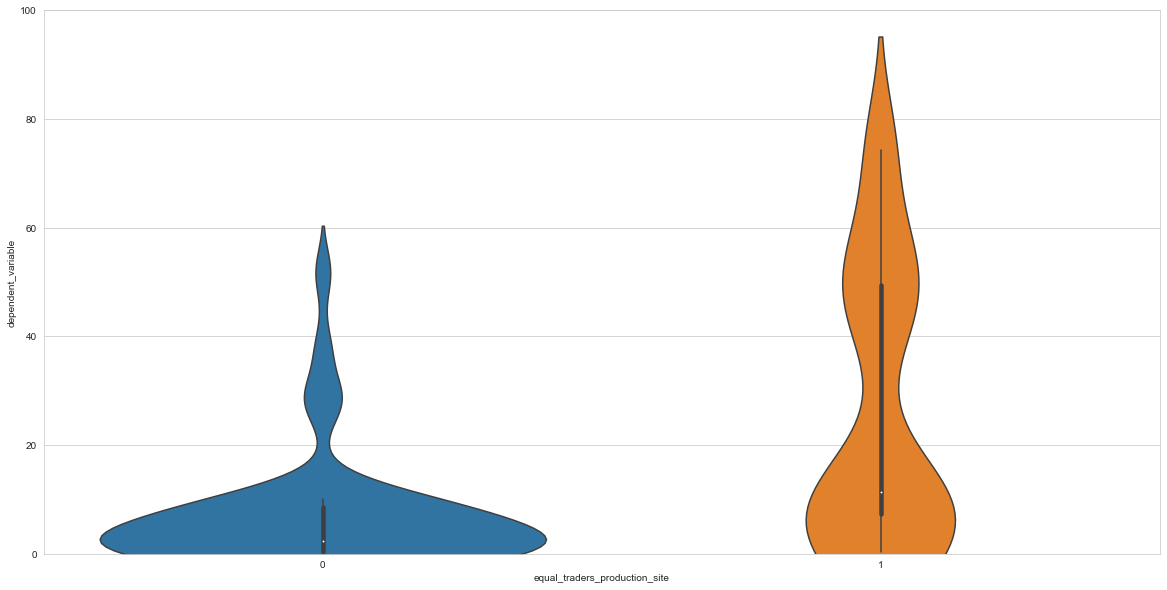

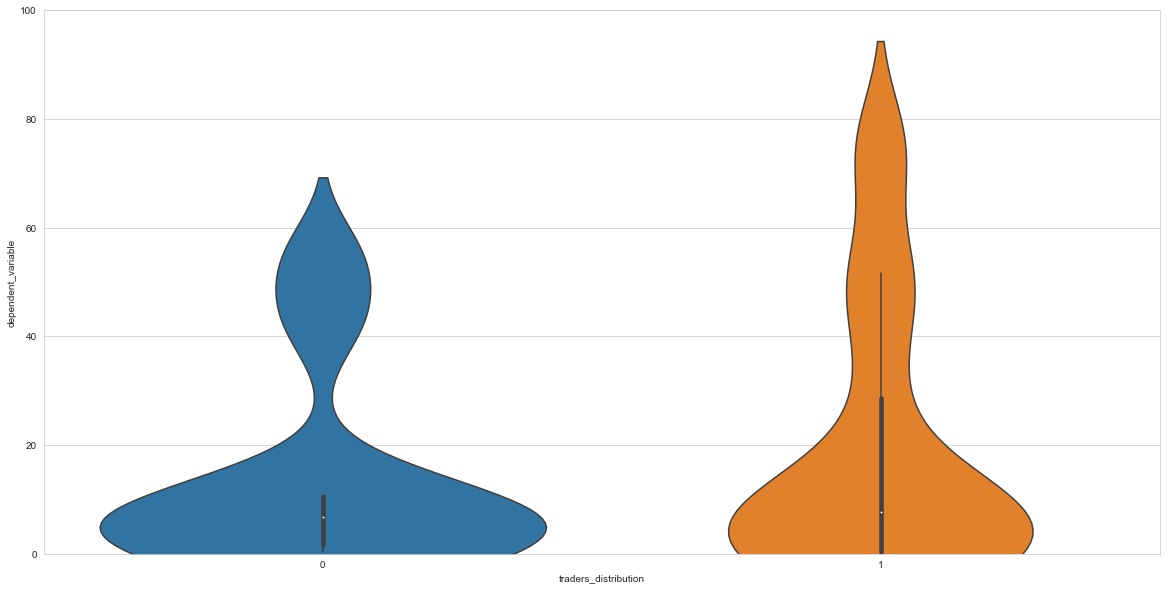

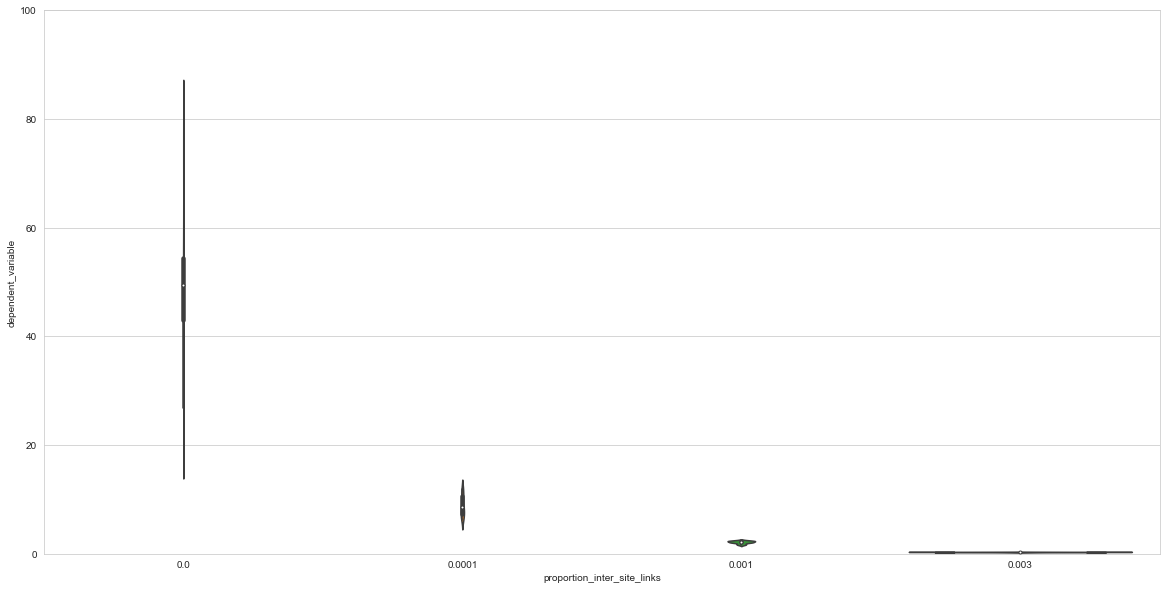

In [10]:
for i in independent_variables:
    fig, axes = plt.subplots(figsize = (20, 10))
    axes.set_ylim([0,100])
    ax = sns.violinplot(x=i, y = 'dependent_variable', data=df)

### Hex plots

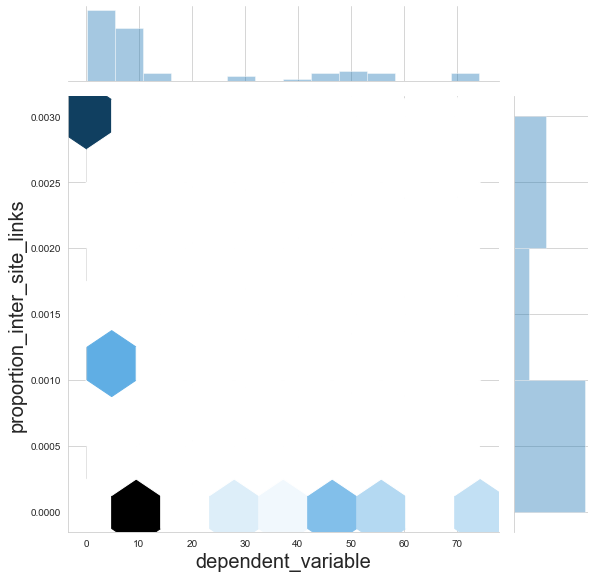

In [11]:
y = 'proportion_inter_site_links'

g = sns.jointplot(y=y, x='dependent_variable', data=df, kind="hex", height=8)
g.set_axis_labels('dependent_variable', y, fontsize=20)